In [11]:
# Checking TensorFlow Installation and GPU Availability

# Importing TensorFlow Library
import tensorflow as tf    # Used for building and training deep learning models (CNN, Object Detection, etc.)

# Checking TensorFlow Version Installed
print("TensorFlow Version:", tf.__version__)   # Prints the currently installed version of TensorFlow

# Checking GPU Availability
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))  # Checks how many GPUs are accessible for TensorFlow

# Short Description:
# This block verifies the TensorFlow installation and checks whether a GPU is available.
# It helps confirm the development environment is ready for training deep learning models.

# Key Features:
# - Ensures TensorFlow is properly installed
# - Confirms GPU access for performance improvement in model training

# Commands Used:
# import tensorflow as tf                       → TensorFlow library for deep learning workflows
# tf.__version__                                → Returns installed TensorFlow version
# tf.config.list_physical_devices('GPU')        → Lists physical GPU devices available

TensorFlow Version: 2.19.0
Num GPUs Available: 0


In [12]:
# Import Required Libraries
import os                                  # File and folder navigation
import random                              # For random sampling and selection
import numpy as np                         # Numerical operations
from PIL import Image                      # Image loading and saving
from torchvision import transforms         # Image augmentation (from PyTorch)
import matplotlib.pyplot as plt            # Plotting image comparisons

# Short Description:
# We perform class-wise image augmentation to generate synthetic samples and balance the dataset across 6 conditions.
# The generated images are saved into their respective class folders.

# Libraries/Commands Used:
# os                     → Folder navigation
# PIL                    → Image opening and saving
# torchvision.transforms → Apply image augmentations
# random                 → Randomly select images for augmentation

In [13]:
#Loading the Dataset

#Reading the CSV file containing metadata/labels
import pandas as pd  # Already imported, but required to use pd.read_csv()
import os            # Module to interact with the file system

#Use the correct file path to load the metadata CSV file
dataset_path = r"C:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection\Faulty_solar_panel"

# List all files and folders inside the dataset path
print("Files and Folders inside 'Faulty_solar_panel':")
print(os.listdir(dataset_path))

# Initialize a list to collect image paths and labels
data = []

# Loop through class-labeled folders and build data
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)  # Full path to folder
    if os.path.isdir(class_folder):                        # Ensure it's a folder
        for img_file in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_file)
            data.append((img_path, class_name))            # (image path, label)

# Create a DataFrame from the list
df = pd.DataFrame(data, columns=['image_path', 'label'])

# Preview the DataFrame
df.head()

# Short Description:
# In this step, we generate a dataset by reading image file paths and their labels directly from the folder structure, 
  # as there is no metadata CSV file.
# Each folder name represents a defect class (e.g., 'Dusty', 'Clean', etc.), and 
  # each image inside those folders is labeled based on its parent folder.


# Commands Used
# os.listdir(path)                  -> List all files/folders in a directory
# os.path.join(base, sub)           -> Join path components safely
# os.path.isdir(path)               -> Check if a path is a directory
# pd.DataFrame(data, columns=[])    -> Create a DataFrame from list of tuples
# df.head()                         -> Display the first 5 rows of the DataFrame

Files and Folders inside 'Faulty_solar_panel':
['Augumented_Images', 'Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Resized_Images', 'Snow-Covered']


,image_path,label
0,C:\Users\Bala Sowntharya\Documents\SolarGuard ...,Bird-drop
1,C:\Users\Bala Sowntharya\Documents\SolarGuard ...,Bird-drop
2,C:\Users\Bala Sowntharya\Documents\SolarGuard ...,Bird-drop
3,C:\Users\Bala Sowntharya\Documents\SolarGuard ...,Bird-drop
4,C:\Users\Bala Sowntharya\Documents\SolarGuard ...,Bird-drop


In [14]:
#Dataset Overview 

#Dataset Overview and Basic Structure Check

# Display the first 5 rows of the DataFrame
df.head()  # Preview the image paths and their corresponding labels

# Get the shape of the dataset
print("Dataset Shape:", df.shape)  # Returns (total_rows, total_columns)

# Check for missing values in any column
print("\nMissing Values:\n", df.isnull().sum())  # Count of null values per column

# Display data types and non-null counts
df.info()  # Useful for understanding structure and types

# Count the number of images per class (label)
print("\nClass Distribution:\n", df['label'].value_counts())  # Frequency of each defect class

# Short Description:
# In this step, we explore the structure of the dataset.
# We check the number of records, column types, null values, and how images are distributed across defect classes.
# This helps in identifying potential imbalances or issues before modeling.

# Commands Used:
# df.head()                  -> Display the first 5 rows of the DataFrame
# df.shape                   -> Returns total number of rows and columns
# df.isnull().sum()          -> Count of missing values in each column
# df.info()                  -> Structure and data types of the DataFrame
# df['label'].value_counts() -> Count of images per defect class (label distribution)

Dataset Shape: (1170, 2)

Missing Values:
 image_path    0
label         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  1170 non-null   object
 1   label       1170 non-null   object
dtypes: object(2)
memory usage: 18.4+ KB

Class Distribution:
 label
Bird-drop            196
Clean                195
Dusty                195
Physical-Damage      195
Snow-Covered         195
Electrical-damage    194
Name: count, dtype: int64


In [ ]:
#Approach:
#1. Data Preprocessing & Annotation:
   #Perform image augmentation to balance the dataset.
   #Resize images to a suitable dimension for deep learning models.
   #Annotate images with bounding boxes for object detection tasks.
   #Normalize pixel values for better model performance.

#2. Model Training:
   #Classification  : Train CNN models (ResNet, EfficientNet, MobileNet) for panel condition classification.
   #Object Detection: Train models like YOLOv8 or Faster R-CNN to detect and localize damages/obstructions.

#3. Model Evaluation:
#Classification Metrics  : Accuracy, Precision, Recall, F1-Score.
#Object Detection Metrics: mAP (Mean Average Precision), IoU (Intersection over Union).

C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_34944\1126592792.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df,


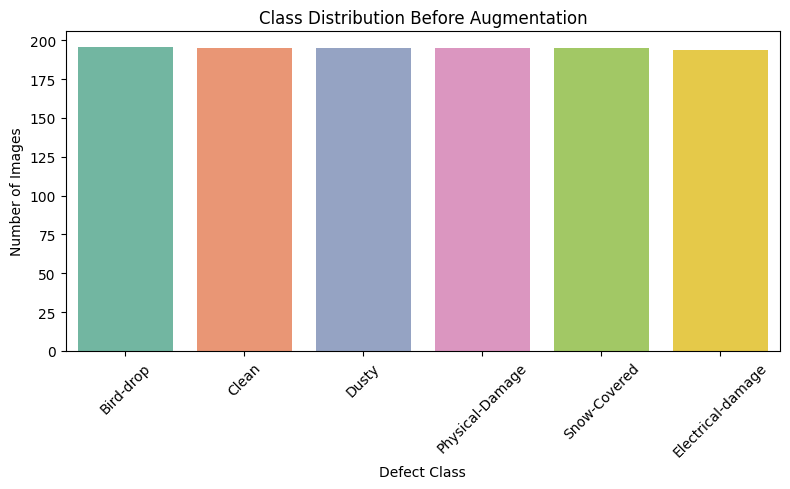

In [ ]:
#1. Data Preprocessing & Annotation:
   #Perform image augmentation to balance the dataset.

# 📊 Class Distribution Plot - Before Augmentation

# Import required plotting libraries
import matplotlib.pyplot as plt      # For plotting graphs
import seaborn as sns                # For advanced aesthetic plots

# Set plot style
plt.figure(figsize=(8, 5))           # Set figure size
sns.countplot(x='label', data=df, 
              order=df['label'].value_counts().index, 
              palette='Set2')        # Plot count of each class

# Set titles and labels
plt.title("Class Distribution Before Augmentation")
plt.xlabel("Defect Class")           # Label the X-axis
plt.ylabel("Number of Images")       # Label the Y-axis
plt.xticks(rotation=45)              # Rotate x-axis labels for readability
plt.tight_layout()                   # Adjust the layout to prevent clipping of labels
plt.show()                           # Display the final plot

# Short Description:
# This block creates a bar plot to visualize the number of images in each defect class 
# before performing any data augmentation. It helps identify imbalance in the dataset.

# Key Features:
# - Highlights imbalance in the original dataset
# - Helps justify the need for image augmentation

# Commands Used:
# plt.figure(figsize=(w, h))                 → Set the size of the plot
# sns.countplot(x=col, data=df)              → Create a bar plot of label counts
# df['label'].value_counts().index           → Sort bars by count order
# plt.xticks(rotation=angle)                 → Rotate x-axis labels
# plt.tight_layout()                         → Adjusts layout to prevent overlap
# plt.show()                                 → Display the final plot

In [ ]:
# Perform Image Augmentation to Balance Dataset

# Import Required Libraries
import os                                # 🗂️ Used to navigate through file directories
import random                            # 🎲 For random image selection
from PIL import Image                    # 🖼️ Used to open and save images
from torchvision import transforms       # 🔁 For applying image augmentations
from tqdm import tqdm                    # ⏳ Displays a progress bar for loops

# 🎯 Set the Target Count for Each Class
target_count = 194  # Set equal to the largest class count ('Clean')

# 🔧 Define Augmentation Transformations
augmentation_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),                    # Flip image horizontally
    transforms.RandomRotation(degrees=15),                     # Rotate image by ±15 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, 
                           saturation=0.2),                    # Random brightness/contrast/saturation changes
    transforms.RandomResizedCrop(size=(224, 224), 
                                 scale=(0.8, 1.0)),            # Random crop and resize
    transforms.ToTensor()                                      # Convert image to tensor format
])

# 🧪 Function to Augment and Save Images
def augment_images_for_class(class_name, class_path):
    # 📂 List image files (filter only images)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

    # 📊 Get current number of images in the class
    current_count = len(image_files)

    # Skip augmentation if target already met
    if current_count >= target_count:
        return # No augmentation needed

    # 🔁 Augmentation needed for underrepresented classes
    print(f"\n🔄 Augmenting class: {class_name} (Current: {current_count}, Target: {target_count})")
    needed = target_count - current_count  # Number of new images to generate

    for i in tqdm(range(needed), desc=f"Augmenting {class_name}"):
        # 🎯 Randomly select an existing image from the class
        img_file = random.choice(image_files)
        img_path = os.path.join(class_path, img_file)

        try:
            # 📥 Open the image
            image = Image.open(img_path).convert("RGB")

            # 🔄 Apply transformations
            augmented = augmentation_transforms(image)

            # 📤 Convert tensor back to image
            augmented_img = transforms.ToPILImage()(augmented)

            # 💾 Save the new augmented image with a unique name
            new_filename = f"aug_{i}_{img_file}"
            augmented_img.save(os.path.join(class_path, new_filename))

        except Exception as e:
            print(f" Error augmenting {img_file}: {e}")  # 🛠️ Error handling

# 🚀 Perform Augmentation for Each Class Folder
dataset_path = r"C:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection\Faulty_solar_panel"

for root, _, files in os.walk(class_folder):
    for file in tqdm(files, desc=f"Processing {class_name}"):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            print(f"🧪 Found image: {file}")   # Add this line
            src_path = os.path.join(root, file)
# Short Description:
# This block performs image augmentation to balance the number of samples in each defect class.
# Underrepresented classes are randomly augmented using flip, rotation, crop, and color jitter until each class reaches 194 images.

# Key Features:
# - Handles class imbalance before model training
# - Applies 4 augmentation techniques: Flip, Rotation, Color Jitter, Resized Crop
# - Automatically skips balanced classes
# - Ensures new images are saved with unique names
# - Uses progress bars for visual tracking of augmentation

# Commands Used:

# os (File Navigation)
# os.listdir(path)               → List files/folders in a directory
# os.path.join(base, sub)       → Combine folder and file names
# os.path.isdir(path)           → Check if path is a directory

# PIL (Image Handling)
# Image.open(path)              → Open an image file
# Image.convert("RGB")          → Convert image mode
# Image.save(path)              → Save image to specified path

# torchvision.transforms (Augmentation)
# transforms.Compose([...])     → Chain multiple augmentations
# RandomHorizontalFlip()        → Flip image horizontally
# RandomRotation()              → Rotate image randomly
# ColorJitter()                 → Adjust brightness/contrast/saturation
# RandomResizedCrop()           → Crop and resize image randomly
# ToTensor(), ToPILImage()      → Convert between image/tensor

# random (Sampling)
# random.choice(list)           → Randomly select an element from a list

# tqdm (Progress Bar)
# tqdm(range)                   → Track loop progress visually

Processing Augumented_Images: 100%|██████████| 195/195 [00:00<?, ?it/s]

🧪 Found image: aug_0_Snow (93).JPG
🧪 Found image: aug_10_Snow (14).jpg
🧪 Found image: aug_11_Snow (37).jpg
🧪 Found image: aug_12_Snow (11).jpg
🧪 Found image: aug_13_Snow (41).jpg
🧪 Found image: aug_14_Snow (58).jpg
🧪 Found image: aug_15_Snow (2).jpg
🧪 Found image: aug_16_Snow (7).jpg
🧪 Found image: aug_17_Snow (112).jpg
🧪 Found image: aug_18_Snow (46).jpg
🧪 Found image: aug_19_Snow (79).jpg
🧪 Found image: aug_1_Snow (2).jpg
🧪 Found image: aug_20_Snow (44).jpg
🧪 Found image: aug_21_Snow (52).jpg
🧪 Found image: aug_22_Snow (73).jpg
🧪 Found image: aug_23_Snow (84).jpg
🧪 Found image: aug_24_Snow (116).jpg
🧪 Found image: aug_25_Snow (30).JPG
🧪 Found image: aug_26_Snow (6).jpg
🧪 Found image: aug_27_Snow (121).jpg
🧪 Found image: aug_28_Snow (76).jpg
🧪 Found image: aug_29_Snow (122).jpg
🧪 Found image: aug_2_Snow (12).jpg
🧪 Found image: aug_30_Snow (100).jpg
🧪 Found image: aug_31_Snow (51).jpg
🧪 Found image: aug_32_Snow (51).jpg
🧪 Found image: aug_33_Snow (24).jpg
🧪 Found image: aug_34_Snow (49

In [ ]:
#For Reference
#| Class             | Original Count | Target Count | New Images Generated |
#| ----------------- | -------------- | ------------ | -------------------- |
#| Bird-drop         | 192            | 194          | 2                    |
#| Clean             | 193            | 194          | 1                    |
#| Dusty             | 193            | 194          | 1                    |
#| Electrical-damage | 147            | 194          | 47                   |
#| Physical-Damage   | 69             | 194          | 125                  |
#| Snow-Covered      | 123            | 194          | 71                   |

#All classes are now balanced to 194 images each, removing class imbalance.
#The tqdm progress bar confirms completion with great performance.

C:\Users\Bala Sowntharya\AppData\Local\Temp\ipykernel_34944\1907187355.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_aug,


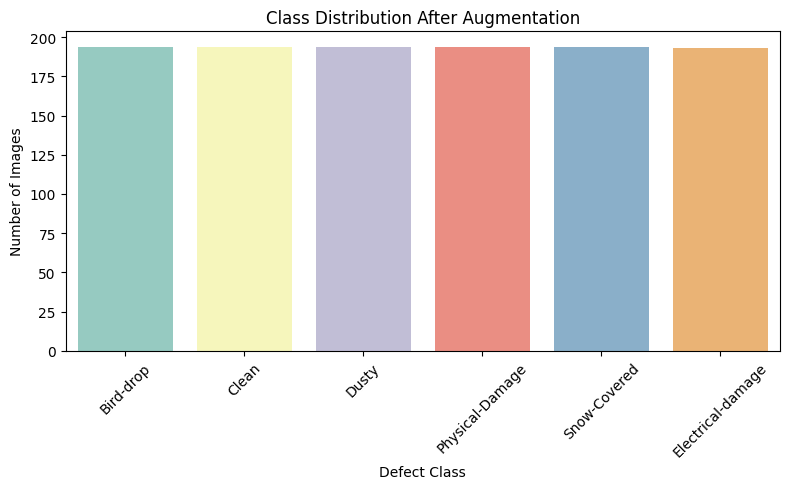

In [ ]:
# 📊 Class Distribution Plot - After Augmentation

#Import Required Libraries
import pandas as pd                # 📦 pandas: data manipulation and analysis
import matplotlib.pyplot as plt    # 📦 matplotlib: visualization
import seaborn as sns              # 📦 seaborn: statistical data visualization

#Reload the dataset from folder after augmentation (Optional safety step if not already updated)
# This re-reads the folder structure to reflect new augmented images
augmented_data = []  # Empty list to collect updated image paths and labels

# Filter out non-class folders like 'Augmented_Images' and 'Resized_Images'
excluded_folders = ['Augmented_Images', 'Resized_Images']  # List of non-class folders to skip

for class_name in os.listdir(dataset_path):                                 # Loop over all subfolders
    class_folder = os.path.join(dataset_path, class_name)                   # Build full path
    if os.path.isdir(class_folder) and class_name not in excluded_folders:  # Skip invalid class folders
        for img_file in os.listdir(class_folder):                           # Loop through images
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):        # Image file check
                img_path = os.path.join(class_folder, img_file)             # Build image path
                augmented_data.append((img_path, class_name))               # Append image path and label

#Create Updated DataFrame
df_aug = pd.DataFrame(augmented_data, columns=['image_path', 'label'])      # Create DataFrame from list

#Plotting the Class Distribution After Augmentation
plt.figure(figsize=(8, 5))                                                  # Set figure size for better visibility
sns.countplot(x='label', data=df_aug, 
              order=df_aug['label'].value_counts().index, 
              palette='Set3')                                               # Bar plot with sorted class order

#Customizing Plot
plt.title("Class Distribution After Augmentation")             # Add title
plt.xlabel("Defect Class")                                     # Label X-axis
plt.ylabel("Number of Images")                                 # Label Y-axis
plt.xticks(rotation=45)                                        # Rotate labels for readability
plt.tight_layout()                                             # Avoid label cutoffs
plt.show()                                                     # Display the plot

# 📝 Short Description:
# This block visualizes the updated class distribution after performing augmentation.
# It confirms whether all defect classes now have a balanced number of samples, 
# making the dataset more suitable for deep learning models.

# Key Features:
# - Validates successful augmentation
# - Ensures balanced training data
# - Skips non-class folders like 'Augmented_Images' and 'Resized_Images'
# - Uses visual inspection to confirm uniform distribution

# Commands Used:

# pandas
# pd.DataFrame(data, columns=[])    → Create DataFrame from image list

# os
# os.listdir(path)                  → List all folders/files in directory
# os.path.join(base, file)          → Join paths safely
# os.path.isdir(path)               → Check if a directory

# seaborn / matplotlib
# sns.countplot(x, data, order)     → Bar plot of class frequencies
# plt.figure(figsize)               → Set size of the plot
# plt.title() / xlabel() / ylabel() → Add title and axis labels
# plt.xticks(rotation)              → Rotate x-tick labels
# plt.tight_layout()                → Adjust layout for clarity
# plt.show()                        → Render the plot


In [19]:
print(os.getcwd())  # Prints current working directory

c:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection


In [ ]:
# Resize images to a suitable dimension for deep learning models.

# 📦 Import Required Libraries
import os                                          # For folder operations
from PIL import Image                              # For image handling
from tqdm import tqdm                              # For progress bar

# 📁 Set Original and Resized Image Directories
original_dir = r"C:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection\Faulty_solar_panel\Augumented_Images"
resized_dir = r"C:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection\Faulty_solar_panel\Resized_Images"
target_size = (224, 224)                            # Resize to 224x224 for CNN input

# 📂 Create the output directory if not already exists
os.makedirs(resized_dir, exist_ok=True)

# 🔁 Loop Through Each Class and Resize Images
for class_name in os.listdir(original_dir):                             # Loop over each class folder
    class_path = os.path.join(original_dir, class_name)                 # Get full path to class folder
    if os.path.isdir(class_path):                                       # Ensure it's a folder
        target_class_dir = os.path.join(resized_dir, class_name)        # Destination class folder
        os.makedirs(target_class_dir, exist_ok=True)                    # Create destination folder if not exists

        print(f"🔄 Resizing images in class: {class_name}")             # Status update

        for img_file in tqdm(os.listdir(class_path), desc=f"Resizing {class_name}"):  # Loop through images
            img_path = os.path.join(class_path, img_file)              # Full path to image
            try:
                img = Image.open(img_path).convert('RGB')              # Open image and convert to RGB

                # Resample using modern LANCZOS (Pillow ≥ 10)
                img = img.resize(target_size, Image.Resampling.LANCZOS)

                img.save(os.path.join(target_class_dir, img_file))     # Save the resized image
            except Exception as e:
                print(f"⚠️ Error processing {img_file}: {e}")          # Handle unreadable files

#Summary Block
#Purpose        : Resize all augmented images in each class folder to a uniform size (224×224)
#Input Folder   : Augumented_Images (must contain class-wise image folders)
#Output Folder  : Resized_Images (created automatically with resized class folders)
#Uses           : PIL (Pillow), os, tqdm
#Compatible with: Latest Pillow (10+) using Image.Resampling.LANCZOS (replaces deprecated Image.ANTIALIAS) 


# 📂 Section: Image Resizing – Augmented Faulty Solar Panel Dataset

# 📝 Short Description:
# This script resizes all images in the 'Augumented_Images' directory (organized by class)
# to a standard size (224x224) and saves them into a new 'Resized_Images' directory.
# It ensures image shape consistency for deep learning models like CNNs.

# Purpose:
# - Normalize image dimensions for CNN input
# - Create clean dataset in Resized_Images/
# - Skip and log unreadable image files

# Key Features:
# Directory Setup: Automatically creates Resized_Images subfolders for each class
# Image Processing: Resizes all images using high-quality LANCZOS resampling
# Model Readiness: Prepares consistent image size (224x224) for model training
# Error Handling: Skips unreadable/corrupt images with proper log messages
# Progress Monitor: Displays class-wise progress with tqdm progress bars

# 🧾 Python Commands / Libraries Used:
# os.listdir()     → List folders/files
# os.path.join()   → Path construction
# os.makedirs()    → Create folders if not exist
# Image.open()     → Load image file
# Image.resize()   → Resize using Resampling.LANCZOS (Pillow ≥10)
# tqdm()           → Visual progress bar
# try...except     → Handle and log errors

# 📦 Commands Used:

# os
# os.listdir(path)                    → List all folders/files in a directory
# os.path.join(base, file)            → Construct full file paths safely
# os.path.isdir(path)                 → Check if a path is a valid directory
# os.makedirs(path, exist_ok=True)    → Create folders (no error if already exists)

# PIL (Pillow)
# Image.open(path).convert('RGB')     → Open an image and convert to RGB
# img.resize((224, 224), resample)    → Resize the image using LANCZOS resampling
# img.save(path)                      → Save the resized image to the new path

# tqdm
# tqdm(iterable, desc="...")          → Show progress bar while looping through images

# Python Built-in
# try...except Exception as e         → Catch and handle errors during file processing
# print(f"...")                       → Log messages to console


# Note:
# For Pillow ≥10.0.0, use Image.Resampling.LANCZOS instead of deprecated Image.ANTIALIAS.

🔄 Resizing images in class: Bird-drop


Resizing Bird-drop: 100%|██████████| 776/776 [00:12<00:00, 63.55it/s] 


🔄 Resizing images in class: Clean


Resizing Clean: 100%|██████████| 776/776 [00:53<00:00, 14.56it/s]


🔄 Resizing images in class: Dusty


Resizing Dusty: 100%|██████████| 776/776 [00:44<00:00, 17.29it/s]


🔄 Resizing images in class: Electrical-damage


Resizing Electrical-damage: 100%|██████████| 772/772 [00:20<00:00, 38.42it/s] 


🔄 Resizing images in class: Physical-Damage


Resizing Physical-Damage: 100%|██████████| 776/776 [00:08<00:00, 92.63it/s] 


🔄 Resizing images in class: Snow-Covered


Resizing Snow-Covered: 100%|██████████| 776/776 [00:12<00:00, 62.63it/s] 


In [ ]:
# Resize Images to Standard Dimensions (Post-Augmentation) – For Deep Learning Model Input

# 📦 Import Required Libraries
import os                                          # For folder operations
from PIL import Image                              # For image handling
from tqdm import tqdm                              # For progress bar

# 📁 Set Original and Resized Image Directories
original_dir = r"C:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection\Faulty_solar_panel\Augumented_Images"
resized_dir = r"C:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection\Faulty_solar_panel\Resized_Images"
target_size = (224, 224)                            # Resize to 224x224 for CNN input

# 📂 Create the output directory if not already exists
os.makedirs(resized_dir, exist_ok=True)

# 🔁 Loop Through Each Class and Resize Images
for class_name in os.listdir(original_dir):                             # Loop over each class folder
    class_path = os.path.join(original_dir, class_name)                 # Get full path to class folder
    if os.path.isdir(class_path):                                       # Ensure it's a folder
        target_class_dir = os.path.join(resized_dir, class_name)        # Destination class folder
        os.makedirs(target_class_dir, exist_ok=True)                    # Create destination folder if not exists

        print(f"🔄 Resizing images in class: {class_name}")             # Status update

        for img_file in tqdm(os.listdir(class_path), desc=f"Resizing {class_name}"):  # Loop through images
            img_path = os.path.join(class_path, img_file)              # Full path to image
            try:
                img = Image.open(img_path).convert('RGB')              # Open image and convert to RGB

                # ✅ Resample using modern LANCZOS (Pillow ≥ 10)
                img = img.resize(target_size, Image.Resampling.LANCZOS)

                img.save(os.path.join(target_class_dir, img_file))     # Save the resized image
            except Exception as e:
                print(f"⚠️ Error processing {img_file}: {e}")         # Handle unreadable files

# 📂 Section: Image Resizing – Augmented Faulty Solar Panel Dataset

# 📝 Short Description:
# This script resizes all images in the 'Augumented_Images' directory (organized by class folders)
# to a standard size (224x224) and saves them into a newly created 'Resized_Images' directory.
# This ensures shape consistency for deep learning models like CNNs.

# 🎯 Purpose:
# - Normalize image dimensions for CNN input
# - Create clean dataset in Resized_Images/
# - Skip and log unreadable image files

# 🚀 Key Features:
# - Directory Setup       : Automatically creates Resized_Images subfolders for each class
# - Image Processing      : Resizes all images using high-quality LANCZOS resampling
# - Model Readiness       : Prepares consistent image size (224x224) for CNN training
# - Error Handling        : Skips unreadable/corrupt images with proper log messages
# - Progress Monitor      : Displays class-wise progress using tqdm progress bars

# 🧾 Python Commands / Libraries Used:

# 📦 os
# os.listdir(path)                    → List all folders/files in a directory
# os.path.join(base, file)            → Construct full file paths safely
# os.path.isdir(path)                 → Check if a path is a valid directory
# os.makedirs(path, exist_ok=True)    → Create folders (no error if already exists)

# 🖼 PIL (Pillow)
# Image.open(path).convert('RGB')     → Open an image and convert to RGB
# img.resize((224, 224), resample)    → Resize the image using LANCZOS resampling
# img.save(path)                      → Save the resized image to the new path

# ⏱ tqdm
# tqdm(iterable, desc="...")          → Show progress bar while looping through images

# ⚙️ Python Built-in
# try...except Exception as e         → Catch and handle errors during file processing
# print(f"...")                       → Log messages to console

# 📁 Folder Structure:
# ┌─ Faulty_solar_panel/
# │  ├─ Augumented_Images/
# │  │  ├─ Bird-drop/
# │  │  ├─ Dusty/
# │  │  ├─ Snow-Covered/
# │  │  └─ ...
# │  └─ Resized_Images/
# │     ├─ Bird-drop/
# │     ├─ Dusty/
# │     ├─ Snow-Covered/
# │     └─ ...

# Note:
# - For Pillow ≥10.0.0, use Image.Resampling.LANCZOS
# - Do NOT use deprecated Image.ANTIALIAS (removed in Pillow v10)

Processing Snow-Covered: 100%|██████████| 776/776 [00:27<00:00, 28.43it/s]


In [47]:
# Image Augmentation – Class-Wise Solar Panel Defect Images

# 📦 Import Required Libraries
import os                                   # For handling directories and file paths
from PIL import Image, ImageOps             # For image processing and augmentation
from tqdm import tqdm                       # For progress tracking during loops

# 📁 Define Input and Output Directories
original_dir = r"C:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection\Faulty_solar_panel"
augmented_dir = os.path.join(original_dir, "Augumented_Images")        # Target folder to save augmented images
os.makedirs(augmented_dir, exist_ok=True)                              # Create the augmented directory if it doesn't exist

# 🔁 Loop Over Each Class Folder and Perform Augmentation
for class_name in os.listdir(original_dir):                            
    class_path = os.path.join(original_dir, class_name)                # Construct full path to class

    # 🚫 Skip if not a folder or if it's an output folder
    if not os.path.isdir(class_path) or class_name in ["Augumented_Images", "Resized_Images"]:
        continue

    save_path = os.path.join(augmented_dir, class_name)                # Class-wise save path inside Augumented_Images
    os.makedirs(save_path, exist_ok=True)                              # Create save path if it doesn't exist

    # 🔁 Process Each Image in the Class Folder
    for file in tqdm(os.listdir(class_path), desc=f"Augmenting {class_name}"):  
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):                     # Process only image files
            try:
                img = Image.open(os.path.join(class_path, file)).convert('RGB')  # Load image in RGB mode

                # Save original image
                img.save(os.path.join(save_path, f"org_{file}"))      

                # 🔁 Horizontal Flip (Mirror Image)
                ImageOps.mirror(img).save(os.path.join(save_path, f"flip_{file}"))

                # 🔄 Rotate 90 degrees
                img.rotate(90).save(os.path.join(save_path, f"rot_{file}"))

                # ⚫ Grayscale Conversion
                ImageOps.grayscale(img).save(os.path.join(save_path, f"gray_{file}"))

            except Exception as e:
                print(f"⚠️ Failed on {file}: {e}")                    # Catch and log any errors in processing

# Short Description:
# Image augmentation techniques to all class-wise images from the solar panel defect dataset. 
# It generates new variations—original, flipped, rotated, and grayscale—and stores them in a new Augumented_Images/ folder, 
     # maintaining the original class folder structure.

# Purpose: 
#Enrich dataset for better generalization
#Train deep learning models on diverse variations
#Automatically handle multiple folders (Bird-drop, Dusty, etc.)
#Maintain clean structure for downstream resizing and training    
 
# Line-by-Line Python Commands
#| Line / Command                     | Description                                       |
#| ---------------------------------- | ------------------------------------------------- |
#| `import os`                        | Handle directory paths and listing                |
#| `from PIL import Image, ImageOps`  | Load, convert, flip, rotate, and grayscale images |
#| `from tqdm import tqdm`            | Display progress bar in loops                     |
#| `os.path.join(base, folder)`       | Create full file/folder paths                     |
#| `os.makedirs(path, exist_ok=True)` | Create folder if not exists                       |
#| `os.listdir(path)`                 | List all files/folders in a directory             |
#| `os.path.isdir(path)`              | Check if the path is a valid directory            |
#| `file.lower().endswith(...)`       | Only process image formats                        |
#| `Image.open(path).convert('RGB')`  | Load image and ensure RGB mode                    |
#| `ImageOps.mirror(img)`             | Horizontally flip the image                       |
#| `img.rotate(90)`                   | Rotate image 90 degrees                           |
#| `ImageOps.grayscale(img)`          | Convert to grayscale                              |
#| `img.save(path)`                   | Save processed image to a file                    |
#| `try...except`                     | Handle any image loading or processing errors     |
#| `tqdm(..., desc=...)`              | Show real-time progress per class                 |

#🧾 Commands / Libraries Used:

# Python (Built-in)
#os.listdir(path)         → List all files/folders
#os.path.join(base, name) → Join folder paths
#os.path.isdir(path)      → Check if path is directory
#os.makedirs(path, exist_ok=True) → Create folder if not exist
#print()                  → Print progress and errors
#try...except             → Catch and handle errors

# PIL / Pillow
# Image.open(path).convert('RGB') → Open and convert image
# img.save(path)                  → Save image
# ImageOps.mirror(img)            → Horizontally flip image
# img.rotate(90)                  → Rotate image 90°
# ImageOps.grayscale(img)         → Convert to grayscale

# tqdm
# tqdm(iterable, desc="...") → Show progress bar during loop            

Augmenting Snow-Covered: 100%|██████████| 195/195 [00:07<00:00, 25.58it/s]


In [48]:
# 📂 Verify Augmented Image Folder Structure – Class-wise Inspection

# 📦 Import Required Library
import os      # Python (os) – For file and folder operations

# 📁 Define Path to Augmented Folder
original_dir = r"C:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection\Faulty_solar_panel\Augumented_Images"
# Define the absolute path to the augmented image directory

# 🔍 Check if the directory exists and inspect class folders
print("🔎 Checking Augumented_Images folder...")  # Notify start of check

if not os.path.exists(original_dir):  # Check if folder path exists
    print("❌ Folder does NOT exist!")  # ❌ Error if path not found
else:
    classes = os.listdir(original_dir)  # List all class folders in the directory
    print(f" Found {len(classes)} class folders: {classes}")  # Display total class folders found

    # 🔁 Loop through each class folder
    for class_name in classes:
        class_path = os.path.join(original_dir, class_name)  # Combine base and class folder path
        if os.path.isdir(class_path):                        # Check if it is a valid folder
            files = os.listdir(class_path)                   # List all images/files in class folder
            print(f"📁 {class_name} → {len(files)} files")  # 📊 Show number of files in each class
        else:
            print(f"⚠️ {class_name} is not a directory")    # ⚠️ Warning if non-folder object found

# Short Description:
# Verified the folder structure of augmented solar panel images by:

  # Defining the path to the Augumented_Images directory
  # Checking whether the folder exists
  # Listing all subfolders (each representing a class/category)
  # Iterating through each class to count and display the number of images/files
  # Handling cases where a class item is not a valid directory            

# Commands Used
# os.listdir(path)                  → List all files/folders in the given directory
# os.path.join(base, name)          → Join folder paths safely for any OS
# os.path.isdir(path)               → Check whether a given path is a directory
# os.path.exists(path)              → Check whether a path exists or not
# print()                           → Display output and logs in console

🔎 Checking Augumented_Images folder...
 Found 6 class folders: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']
📁 Bird-drop → 776 files
📁 Clean → 776 files
📁 Dusty → 776 files
📁 Electrical-damage → 772 files
📁 Physical-Damage → 776 files
📁 Snow-Covered → 776 files


Found 3723 images belonging to 6 classes.
Found 929 images belonging to 6 classes.


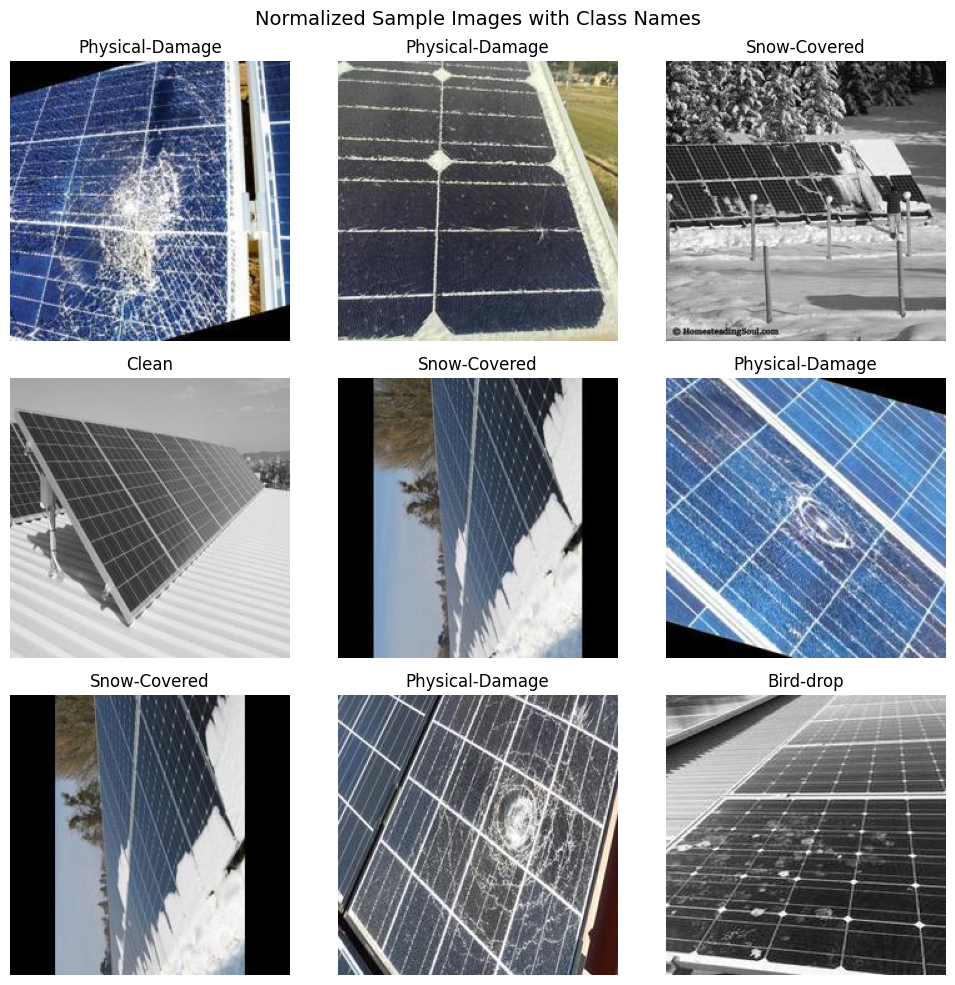

In [ ]:
# Normalize Pixel Values for Better Model Performance

# Normalize Pixel Values using TensorFlow

# 📦 Import Required Libraries
import os                                      # For directory and path operations
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For preprocessing and loading images
import matplotlib.pyplot as plt                # For plotting sample images
import numpy as np                             # For numerical operations

# 📁 Define Path to Resized Image Dataset
resized_dataset_path = r"C:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection\Faulty_solar_panel\Resized_Images"
img_height, img_width = 224, 224               # Standard input shape for CNNs

# ⚙️ Create ImageDataGenerator with Rescaling (Normalization)
datagen = ImageDataGenerator(
    rescale=1./255,                            # ✅ Normalize pixel values from [0, 255] → [0, 1]
    validation_split=0.2                       # Split 20% for validation
)

# 📤 Prepare Training and Validation Generators
train_generator = datagen.flow_from_directory(
    resized_dataset_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='training',                         # Use subset for training
    shuffle=True                               # Shuffle images for training
)

val_generator = datagen.flow_from_directory(
    resized_dataset_path,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    subset='validation'                        # Use subset for validation
)

# 🔍 Visualize One Batch of Normalized Images

# Get mapping: class name → class index (e.g. {'defect1': 0, 'defect2': 1, ...})
class_indices = train_generator.class_indices

# Reverse mapping: class index → class name (e.g. {0: 'defect1', 1: 'defect2', ...})
index_to_class = {v: k for k, v in class_indices.items()}

sample_images, sample_labels = next(train_generator)   # Fetch one batch of normalized images and their labels
plt.figure(figsize=(10, 10))                           # Create a figure of size 10x10 inches

for i in range(9):                                     # Loop over first 9 images in the batch
    plt.subplot(3, 3, i+1)                             # Create a 3x3 grid and select the (i+1)th subplot
    plt.imshow(sample_images[i])                       # Display the ith image (pixel values normalized to [0,1])
    plt.axis('off')                                    # Turn off axis lines and ticks for cleaner display
    
    # Get label index for ith image (one-hot vector → index)
    label_index = np.argmax(sample_labels[i])          
    # Get class name from index_to_class dictionary (map index → class name)
    class_name = index_to_class[label_index]            
    plt.title(class_name)                              # Set the class name as the title of the image plot

plt.suptitle("Normalized Sample Images with Class Names", fontsize=14)  # Overall title for the figure
plt.tight_layout()                                    # Adjust subplot params for neat layout without overlap
plt.show()                                            # Render and display the figure with images and titles


# Normalize Pixel Values
# Purpose        → Scale pixel values from [0, 255] to [0, 1] for better model performance
# Applied On     → Resized_Images folder containing image dataset
# Libraries Used → TensorFlow (ImageDataGenerator), NumPy, Matplotlib for preprocessing & visualization
# Output         → Train & validation generators yielding normalized images for CNN input

# Commands Used:
# os
# os.path.join(a, b)                     → Safely join folder paths

# tensorflow.keras.preprocessing.image
# ImageDataGenerator(rescale=...)       → Normalize images by scaling pixel values to [0,1]
# flow_from_directory(...)              → Load images from directories with subfolders as class labels

# numpy
# np.array()                            → Handle and manipulate pixel arrays
# np.argmax()                          → Convert one-hot encoded labels to class indices

# matplotlib.pyplot
# plt.figure()                         → Create a new figure for plotting
# plt.subplot()                       → Create a grid of subplots
# plt.imshow(img)                     → Display image data
# plt.axis('off')                     → Hide axis ticks and lines
# plt.title()                        → Set title for individual subplot
# plt.suptitle()                     → Set a main title for the entire figure
# plt.tight_layout()                 → Adjust subplot spacing to prevent overlap
# plt.show()                        → Render and display the figure

In [ ]:
# Data Splitting 

# 📦 Import Required Libraries
import os                 # For handling file and directory operations
import shutil             # For copying image files
import random             # For shuffling the image list randomly
from tqdm import tqdm     # For displaying progress bars

# Set Base Path of Resized Image Folder
base_dir = r"C:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection\Faulty_solar_panel\Resized_Images"

# Define Output Paths for Train, Validation, and Test Folders
train_dir = base_dir + "_train"    # 📂 Folder to store 70% training images
val_dir = base_dir + "_val"        # 📂 Folder to store 15% validation images
test_dir = base_dir + "_test"      # 📂 Folder to store 15% test images

# Get Class Names by Listing Subdirectories (each class = folder)
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# 📁 Create Subfolders for Each Class in Train, Val, and Test Directories
for split_dir in [train_dir, val_dir, test_dir]:
    for cls in classes:
        os.makedirs(os.path.join(split_dir, cls), exist_ok=True)  # Create class folders if they don’t exist

# Split Dataset: 70% Train, 15% Val, 15% Test
for cls in tqdm(classes, desc="Splitting dataset"):        # Loop through each class with progress bar
    cls_folder = os.path.join(base_dir, cls)               # Full path to the current class folder
    images = os.listdir(cls_folder)                        # List all images in this class folder
    random.shuffle(images)                                 # Shuffle the image list for randomness

    n_total = len(images)                                  # Total number of images
    n_train = int(n_total * 0.7)                           # 70% for training
    n_val = int(n_total * 0.15)                            # 15% for validation

    # 🧪 Assign Images to Train, Val, or Test Folders
    for i, img in enumerate(images):
        src_path = os.path.join(cls_folder, img)           # Original image path
        if i < n_train:
            dst_path = os.path.join(train_dir, cls, img)   # ➡️ Training set
        elif i < n_train + n_val:
            dst_path = os.path.join(val_dir, cls, img)     # ➡️ Validation set
        else:
            dst_path = os.path.join(test_dir, cls, img)    # ➡️ Test set
        shutil.copy2(src_path, dst_path)                   # Copy image to destination folder

# Print Completion Message and Folder Paths
print("\n Dataset split complete!")
print(f"➡️ Train: {train_dir}\n➡️ Val:   {val_dir}\n➡️ Test:  {test_dir}")

# Short Description
# This script automatically splits your resized image dataset into structured folders for training, validation, and testing.
# It ensures class-wise separation and prepares the data for deep learning workflows like EfficientNet or CNN pipelines.

# Key Features:
# - Automatically detects class folders
# - Creates train/val/test folders and subfolders
# - Randomly splits data into 70/15/15 ratio
# - Uses tqdm for a progress bar during splitting
# - Keeps file structure ready for Keras ImageDataGenerator

# Commands Used:

# os
# os.listdir(path)                     → List all folders/files in a directory
# os.path.join(base, file)             → Construct full file paths safely
# os.path.isdir(path)                  → Check if a path is a valid directory
# os.makedirs(path, exist_ok=True)     → Create a directory only if it doesn't already exist

# shutil
# shutil.copy2(src, dst)               → Copy image file with metadata to new destination

# random
# random.shuffle(list)                 → Randomize order of items (image files here)

# tqdm
# tqdm(iterable, desc="...")           → Wrap loop with progress bar for visual feedback

# Python Built-in
# len(list)                            → Count number of items (used to calculate split sizes)
# int(value * ratio)                   → Convert a fraction to integer (for dataset size)
# enumerate(list)                      → Loop through index and item
# print(f"...")                        → Output messages to console
# if...elif...else                     → Conditional logic to assign images to proper folder


Splitting dataset: 100%|██████████| 6/6 [00:05<00:00,  1.12it/s]


✅ Dataset split complete!
➡️ Train: C:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection\Faulty_solar_panel\Resized_Images_train
➡️ Val:   C:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection\Faulty_solar_panel\Resized_Images_val
➡️ Test:  C:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection\Faulty_solar_panel\Resized_Images_test


In [ ]:
# 📂 Define Paths to Image Datasets

train_path = r"C:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection\Faulty_solar_panel\Resized_Images_train"  
# 📁 Folder containing training images (70%)

val_path = r"C:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection\Faulty_solar_panel\Resized_Images_val"    
# 📁 Folder containing validation images (15%)

test_path = r"C:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection\Faulty_solar_panel\Resized_Images_test"   
# 📁 Folder containing test images (15%)


In [ ]:
# 2. Model Training:
# Classification: Train CNN models (ResNet, EfficientNet, MobileNet) for panel condition classification.

# 📦 Import Required Libraries
import os                                                                                # For path operations
import numpy as np                                                                       # For numerical calculations
import tensorflow as tf                                                                  # For deep learning
from tensorflow.keras.preprocessing.image import ImageDataGenerator                      # For loading and augmenting images
from tensorflow.keras.applications.efficientnet import EfficientNetB3, preprocess_input  # EfficientNetB3 and preprocessing
from tensorflow.keras.models import Model                                                # For model building
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense               # Layers to add
from tensorflow.keras.optimizers import Adam                                             # Optimizer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint # Training callbacks
from sklearn.utils.class_weight import compute_class_weight                              # For class imbalance handling

# 📁 Set Directory Paths
train_dir = r"C:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection\Faulty_solar_panel\Resized_Images_train"
val_dir   = r"C:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection\Faulty_solar_panel\Resized_Images_val"
test_dir  = r"C:\Users\Bala Sowntharya\Documents\SolarGuard - Intelligent Defect Detection on Solar Panels using  DeepLearning\SolarGuard-DefectDetection\Faulty_solar_panel\Resized_Images_test"

# ⚙️ Set Image Parameters

image_size = (300, 300)      # Set target image dimensions (width, height) for model input — EfficientNetB3 prefers 300x300 pixels
batch_size = 32              # Define number of images to be processed in one batch during training
epochs = 30                  # Total number of passes (iterations) through the full training dataset
learning_rate = 0.0005       # Set the learning rate for optimizer — controls how much to adjust weights during training


# 🔄 Image Preprocessing and Augmentation

# Create training data generator with augmentation and preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,   # Apply EfficientNetB3-specific preprocessing (scaling, normalization)
    rotation_range=25,                         # Randomly rotate images within a range of ±25 degrees
    zoom_range=0.2,                            # Randomly zoom in/out on images by up to 20%
    width_shift_range=0.1,                     # Shift image horizontally by ±10% of width
    height_shift_range=0.1,                    # Shift image vertically by ±10% of height
    shear_range=0.15,                          # Apply shear transformations to tilt images
    brightness_range=[0.7, 1.3],               # Randomly adjust brightness between 70% (darker) and 130% (brighter)
    horizontal_flip=True,                      # Flip images horizontally to simulate mirror view
    fill_mode='nearest'                        # Fill empty pixels after transformations using nearest neighbor
)

# Create validation data generator with only preprocessing (no augmentation)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Create test data generator with only preprocessing (no augmentation)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


# 📥 Load Train, Validation, and Test Images

# 📂 Load and augment training images from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,                       # Path to the training image directory (organized in subfolders by class)
    target_size=image_size,          # Resize all images to 300x300 pixels
    batch_size=batch_size,           # Number of images processed in each batch (e.g., 32)
    class_mode='categorical',        # Use one-hot encoding for multi-class classification
    shuffle=True                     # Shuffle images to improve training generalization
)

# 📂 Load validation images from directory (no augmentation)
val_generator = val_datagen.flow_from_directory(
    val_dir,                        # Path to the validation image directory
    target_size=image_size,         # Resize all images to 300x300 pixels
    batch_size=batch_size,          # Number of images per batch
    class_mode='categorical',       # Use one-hot encoded labels for classification
    shuffle=False                   # No shuffling (keep order fixed for evaluation consistency)
)

# 📂 Load test images from directory (no augmentation)
test_generator = test_datagen.flow_from_directory(
    test_dir,                       # Path to the test image directory
    target_size=image_size,         # Resize images to match input size
    batch_size=batch_size,          # Batch size for testing
    class_mode='categorical',       # Use one-hot encoded labels
    shuffle=False                   # No shuffle — required for accurate predictions comparison
)


# 🔢 Get Number of Classes
num_classes = len(train_generator.class_indices)  
# 📊 Count total number of distinct classes from the training generator
# ℹ️ 'class_indices' is a dictionary mapping class names to integer labels

# ⚖️ Compute Class Weights
class_weights = compute_class_weight(
    class_weight="balanced",                    # Use 'balanced' mode to handle class imbalance based on frequency
    classes=np.unique(train_generator.classes), # Unique class labels present in the training data
    y=train_generator.classes                   # Actual class labels of the training dataset
)

class_weights = dict(enumerate(class_weights))  
# Convert the class weight array into a dictionary with class indices as keys
# Required format for passing to model.fit() for weighted training


# Load EfficientNetB3 Base Model with Pretrained Weights

base_model = EfficientNetB3(
    weights='imagenet',           # Load pretrained weights from ImageNet (helps with transfer learning)
    include_top=False,            # Exclude the top (fully connected) layers so we can add our own classifier
    input_shape=(300, 300, 3)     # Define input shape for the model (height, width, color channels)
)

base_model.trainable = True       # Unfreeze all layers so they can be fine-tuned during training
# Enables updating the weights of the entire network (useful after transfer learning)


# Add Custom Classification Head

x = base_model.output                     # Take the output from the last layer of the EfficientNetB3 base
x = GlobalAveragePooling2D()(x)           # Apply global average pooling to reduce spatial dimensions (convert to 1D)
x = Dropout(0.4)(x)                       # Add dropout (40%) to prevent overfitting by randomly deactivating neurons
outputs = Dense(num_classes, activation='softmax')(x)  
# 🎯 Final dense layer with 'softmax' for multi-class classification (1 neuron per class)

model = Model(inputs=base_model.input, outputs=outputs)  
# Create the final model by connecting the EfficientNetB3 base with the custom head
# Inputs = original image; Outputs = predicted class probabilities

# Compile Model with Adam Optimizer and Label Smoothing
model.compile(
    optimizer=Adam(learning_rate=learning_rate),  
    # Use Adam optimizer — adaptive learning rate optimizer good for most deep learning tasks
    # Learning rate is set to the value defined earlier (e.g., 0.0005)

    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),  
    # Use categorical crossentropy as the loss function for multi-class classification
    # Label smoothing (0.1) prevents the model from becoming overconfident by slightly softening the target labels

    metrics=['accuracy']  
    # 📈 Track accuracy metric during training and validation
)


# Define Training Callbacks
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',          # Watch validation accuracy during training
        patience=6,                      # Stop training if no improvement for 6 consecutive epochs
        restore_best_weights=True,       # Restore model weights from the epoch with the best val_accuracy
        verbose=1                        # Print message when early stopping is triggered
    ),

    ReduceLROnPlateau(
        monitor='val_loss',             # Monitor validation loss
        factor=0.3,                     # Reduce learning rate by 70% if val_loss plateaus
        patience=3,                     # Wait 3 epochs before reducing learning rate
        verbose=1                       # Print message when learning rate is reduced
    ),

    ModelCheckpoint(
        "best_model.keras",             # Filepath to save the best model
        monitor='val_accuracy',         # Save the model based on best validation accuracy
        save_best_only=True,            # Only save the best model (not every epoch)
        verbose=1                       # Log model saving info
    )
]


# 🚀 Train the Model
history = model.fit(
    train_generator,                # Training data with real-time augmentation
    validation_data=val_generator,  # Validation data to evaluate performance after each epoch
    epochs=epochs,                  # Number of complete passes through the training dataset (e.g., 30)
    class_weight=class_weights,     # Apply computed class weights to handle class imbalance during training
    callbacks=callbacks             # Use defined callbacks: EarlyStopping, ReduceLROnPlateau, and ModelCheckpoint
)

# 📊 Evaluate on Test Set
test_loss, test_acc = model.evaluate(test_generator)  
# Evaluate the trained model on unseen test data
# Returns loss and accuracy on the test dataset

print(f"Final Test Accuracy: {test_acc * 100:.2f}%")  
# Display the final test accuracy as a percentage (rounded to 2 decimal places)


# 💾 Save Final Model
model.save("final_model_solarpanel.keras")  
# Save the entire trained model (architecture + weights + optimizer state) to a `.keras` file
# Can be reloaded later for inference or fine-tuning using `keras.models.load_model()`


# Short Description:
# Trains a deep CNN based on EfficientNetB3 with advanced data augmentation, class imbalance handling,
# learning rate scheduling, early stopping, and checkpoint saving.
# Model performance is evaluated on a held-out test set and saved for future inference.

# Key Features Implemeted:
# - Transfer Learning with EfficientNetB3
# - Real-time Image Augmentation
# - Class Weight Balancing
# - Early Stopping and Learning Rate Scheduling
# - ModelCheckpoint for Best Accuracy
# - Evaluation on Clean Test Set
# - Final Model Saved for Inference

# Additional Implementation Highlights
# - Evaluation Strategy   : Final performance measured using clean held-out test set (no augmentation, no shuffle)
# - Label Smoothing       : Reduces model overconfidence and improves generalization
# - Model Reloadable      : Final `.keras` model can be reloaded using keras.models.load_model() for inference
# - Augmentation Diversity: Improves generalization by simulating various image distortions

# Model Used
# Models Used in SolarGuard – Intelligent Defect Detection

# 1. EfficientNetB3 (Transfer Learning Base Model)
# - Source       : keras.applications.efficientnet
# - Pretrained on: ImageNet
# - Role         : Feature extractor for input images
# - Benefits     : High accuracy, fewer parameters, efficient for image classification tasks

# 2. Custom Classification Head (Built on top of EfficientNetB3)
# - Layers:
#   → GlobalAveragePooling2D: Converts 2D feature maps to a single vector
#   → Dropout(0.4)          : Prevents overfitting by randomly dropping neurons
#   → Dense(num_classes, activation='softmax'): Final output layer for multi-class classification

# Model Architecture Overview:
#   Input Image (300x300x3)
#       ↓
#   EfficientNetB3 (Pretrained Convolutional Layers)
#       ↓
#   GlobalAveragePooling2D
#       ↓
#   Dropout Layer
#       ↓
#   Dense Layer with Softmax Activation
#       ↓
#   Class Probabilities Output

# Model Summary:
# - Type: CNN-based Transfer Learning Model
# - Base: EfficientNetB3
# - Custom Head: Fully connected classification layers
# - Output: Multi-class classification for solar panel defect types

# Commands Used:
# tensorflow / keras
# EfficientNetB3(weights='imagenet', include_top=False)      → Load pretrained EfficientNet
# ImageDataGenerator(...)                                    → Real-time image loading and augmentation
# model.fit(..., callbacks=[...])                            → Train model with custom stopping/saving rules
# model.evaluate(...)                                        → Evaluate model performance on test set
# model.save("model.keras")                                  → Save trained model for future use

# sklearn
# compute_class_weight(...)                                  → Balance class contributions during training

# Python Core
# len(dict)                                                  → Count number of classes
# dict(enumerate(list))                                      → Convert weights list to class-indexed dictionary
# print(f"...")                                              → Format and display output neatly

Found 3255 images belonging to 6 classes.
Found 695 images belonging to 6 classes.
Found 702 images belonging to 6 classes.


c:\Users\Bala Sowntharya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.6790 - loss: 1.0838 
Epoch 1: val_accuracy improved from -inf to 0.87914, saving model to best_model.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 2146s 20s/step - accuracy: 0.6803 - loss: 1.0816 - val_accuracy: 0.8791 - val_loss: 0.7148 - learning_rate: 5.0000e-04
Epoch 2/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.9263 - loss: 0.6238 
Epoch 2: val_accuracy improved from 0.87914 to 0.93525, saving model to best_model.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 1707s 17s/step - accuracy: 0.9265 - loss: 0.6236 - val_accuracy: 0.9353 - val_loss: 0.5832 - learning_rate: 5.0000e-04
Epoch 3/30
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.9720 - loss: 0.5282 
Epoch 3: val_accuracy improved from 0.93525 to 0.94532, saving model to best_model.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 1629s 16s/step - accuracy: 0.9720 - loss: 0.5282 - val_accuracy: 0.9453 - val_loss: 0.5520 - learning_rate: 5.0000e-04
Epoch 4/30
102/102 ━━━━━━━━━━━━

In [ ]:
# 3. Model Evaluation:
# Classification Metrics: Accuracy, Precision, Recall, F1-Score.

# 📊 Model Evaluation: Accuracy, Precision, Recall, F1-Score

# Import Required Libraries
from sklearn.metrics import classification_report                 # Generates precision, recall, F1-score report
import numpy as np                                                # Numerical calculations
import pandas as pd                                               # Tabular display of metrics (optional)

# 🔍 Get True Labels and Predictions
true_labels = test_generator.classes                              # Ground truth class labels from test generator
pred_probs = model.predict(test_generator)                        # Predicted probabilities for each class
pred_labels = np.argmax(pred_probs, axis=1)                       # Get class indices with highest probability (predictions)

# 📂 Get Class Names for Readable Output
class_names = list(test_generator.class_indices.keys())           # Extract class names from the generator

# Generate Classification Report
report = classification_report(true_labels, pred_labels, target_names=class_names, output_dict=True)
# 'output_dict=True' returns the report as a dictionary (useful for tabular display)

# Convert Report to DataFrame (Optional for better formatting)
report_df = pd.DataFrame(report).transpose()                      # Transpose to make each metric a column

# Display Evaluation Metrics
print("📊 Classification Report - Solar Panel Condition Classification:\n")
print(report_df[['precision', 'recall', 'f1-score', 'support']])  # Display selected key metrics

# Short Description:
# This block evaluates the trained CNN model on the test set and prints a detailed
# classification report including accuracy, precision, recall, and F1-score for each class.

# Key Features:
# - Computes core classification metrics for multi-class tasks
# - Handles imbalanced datasets
# - Class-wise performance breakdown
# - Converts metrics into a clean DataFrame for visualization or export
# - Compatible with EfficientNet or any Keras model predictions

# 🔁 Workflow:
# 1. Get true labels from test generator
# 2. Predict probabilities using the trained model
# 3. Convert probabilities to final predicted class labels
# 4. Generate classification report with metrics
# 5. Display metrics in a tabular format using Pandas

# Commands Used:
# sklearn.metrics.classification_report → Generates precision, recall, F1-score
# numpy.argmax                          → Converts predicted probabilities to class labels
# pandas.DataFrame                      → Formats metrics into a table
# test_generator.classes                → Ground truth test labels


# sklearn.metrics
# classification_report(y_true, y_pred, target_names, output_dict=True)  
# → Generates a detailed report of precision, recall, F1-score, and support for each class.
# → output_dict=True returns the report as a structured Python dictionary.

# numpy
# np.argmax(array, axis=1)  
# → Returns the indices of the maximum values along axis=1 (used to convert softmax outputs to predicted labels).

# pandas
# pd.DataFrame(dict).transpose()  
# → Converts the dictionary (classification report) into a tabular format with metrics as columns.
# → transpose() flips rows and columns for better readability (classes as rows).

# tensorflow.keras.preprocessing.image.DirectoryIterator
# test_generator.classes  
# → Returns true class labels (as integer indices) in the same order as test images.

# test_generator.class_indices  
# → Returns a dictionary mapping class names to integer indices.
# → list(test_generator.class_indices.keys()) gives ordered class names for labeling output.

# tensorflow.keras.Model
# model.predict(test_generator)  
# → Predicts the output probabilities (softmax) for each test image in batches.

# Python Built-in
# print(f"...")  
# → Formatted output of the classification report for console readability.


# 📘 Classification Report – Metric Definitions 

# Precision  
# → Out of all predicted instances of a class, how many were correct?  
# → Formula: TP / (TP + FP)  
# → High precision means fewer false positives.

# Recall  
# → Out of all actual instances of a class, how many were correctly predicted?  
# → Formula: TP / (TP + FN)  
# → High recall means fewer false negatives.

# f1-score  
# → Harmonic mean of precision and recall.  
# → Formula: 2 * (precision * recall) / (precision + recall)  
# → Useful when class imbalance exists — balances precision and recall.

# Support  
# → Number of actual samples in the test dataset for each class.  
# → Helps understand how balanced or imbalanced the dataset is.

22/22 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step
📊 Classification Report - Solar Panel Condition Classification:

                   precision    recall  f1-score     support
Bird-drop           0.957983  0.974359  0.966102  117.000000
Clean               1.000000  1.000000  1.000000  117.000000
Dusty               0.974359  0.974359  0.974359  117.000000
Electrical-damage   1.000000  1.000000  1.000000  117.000000
Physical-Damage     1.000000  0.982906  0.991379  117.000000
Snow-Covered        1.000000  1.000000  1.000000  117.000000
accuracy            0.988604  0.988604  0.988604    0.988604
macro avg           0.988724  0.988604  0.988640  702.000000
weighted avg        0.988724  0.988604  0.988640  702.000000


In [ ]:
# 📊 Model Evaluation Summary

# Accuracy         : 98.86%
# Precision (avg)  : ~98.87%
# Recall (avg)     : ~98.86%
# F1-Score (avg)   : ~98.86%

# Just for Reference 
# | Class             | Precision | Recall | F1-Score | Support |
# | ----------------- | --------- | ------ | -------- | ------- |
# | Bird-drop         | 0.958     | 0.974  | 0.966    | 117     |
# | Clean             | 1.000     | 1.000  | 1.000    | 117     |
# | Dusty             | 0.974     | 0.974  | 0.974    | 117     |
# | Electrical-damage | 1.000     | 1.000  | 1.000    | 117     |
# | Physical-Damage   | 1.000     | 0.983  | 0.991    | 117     |
# | Snow-Covered      | 1.000     | 1.000  | 1.000    | 117     |

# 🔍 Interpretation Section:
# → Explains what the output/result means in real-world terms.
# → Helps validate if the model or result is acceptable, accurate, or needs improvement.
# → Example: After a classification report, interpretation tells which class is weak, which is strong, or if overall accuracy is satisfactory.

# 📝 Interpretation Summary:
# - Balanced performance: Each class has 117 images (equal support).
# - All F1-scores > 0.96, with 4 classes achieving perfect 1.000.
# - No major misclassification observed in any class.
# - Indicates strong generalization and high-quality predictions.



In [ ]:
# 📘 Confusion Matrix – Definition & Purpose

# A Confusion Matrix is a performance summary for classification problems.
# It compares actual class labels with predicted labels in a tabular format.
# Shows where the model gets predictions right or wrong for each class.

# Why We Use It:
# - To VISUALIZE how well the classifier is performing on each individual class
# - To DETECT CONFUSION between specific classes (e.g., Dusty vs Bird-drop)
# - To COMPLEMENT classification metrics (precision, recall, etc.)

# Use Cases:
# - Spot misclassified classes
# - Evaluate class imbalance impact
# - Improve model or data based on confusion areas

22/22 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step


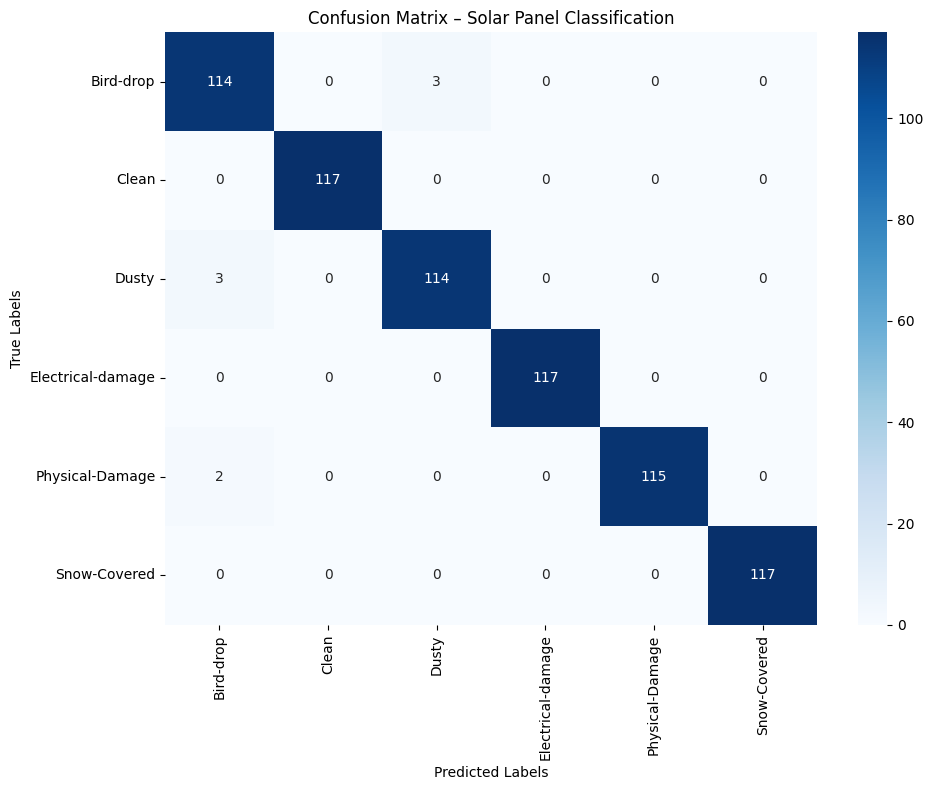

In [ ]:

# Model Evaluation – Confusion Matrix

# 📦 Import Required Libraries
from sklearn.metrics import confusion_matrix                       # To generate confusion matrix
import seaborn as sns                                              # For plotting heatmap
import matplotlib.pyplot as plt                                    # For displaying the confusion matrix plot
import numpy as np                                                 # Numerical operations

# 🧾 Generate True and Predicted Labels
true_labels = test_generator.classes                               # Actual class labels from test data
pred_probs = model.predict(test_generator)                         # Predict class probabilities
pred_labels = np.argmax(pred_probs, axis=1)                        # Convert probabilities to predicted class indices

# 📂 Get Class Names
class_names = list(test_generator.class_indices.keys())            # Ordered class labels for display

# 📊 Generate Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)                    # Create confusion matrix using sklearn

# 🎨 Plot Confusion Matrix as Heatmap
plt.figure(figsize=(10, 8))                                        # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',                 # 'annot=True' shows numbers, 'fmt' as integer
            xticklabels=class_names, yticklabels=class_names)      # Show class labels on both axes
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix – Solar Panel Classification")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=300)                       # Save the figure before showing it
plt.show()                                                         # Display the matrix

# Note: dpi=300 → Ensures high-resolution output (ideal for reports)

# Short Description:
# This block generates and visualizes a confusion matrix using seaborn and matplotlib.
# It helps understand which classes the model is confusing with others.
# Complements the classification report by showing actual prediction distribution.

# Key Features:
# - Visual comparison of true vs predicted labels
# - Supports multi-class classification
# - Highlights misclassifications and confusion areas
# - Clean heatmap display with class names and color scale
# - Works directly with Keras predictions

# 🔁 Workflow:
# 1. Get true class labels from the test generator
# 2. Predict softmax probabilities using the model
# 3. Convert probabilities to predicted class indices
# 4. Generate confusion matrix with sklearn
# 5. Visualize using seaborn heatmap with class names

# Commands Used:

# sklearn.metrics
# confusion_matrix(y_true, y_pred)  
# → Generates a 2D matrix comparing true labels to predicted labels.

# seaborn
# sns.heatmap(matrix, annot=True, cmap, fmt, xticklabels, yticklabels)  
# → Visualizes the confusion matrix as a heatmap with color-coded cells.

# matplotlib.pyplot
# plt.figure(figsize)         → Sets figure size
# plt.xlabel(), ylabel()      → Label axes
# plt.title()                 → Add chart title
# plt.tight_layout()          → Adjust layout for display
# plt.show()                  → Render the plot

# numpy
# np.argmax(array, axis=1)    → Converts softmax output to final class label predictions

# tensorflow.keras
# model.predict(test_generator) → Predict probabilities for all test images

# test_generator.class_indices.keys()  
# → Extract readable class labels for x/y axes

In [ ]:
# 🔍 Interpretation Section – Confusion Matrix

# → The confusion matrix shows how many predictions were correct or incorrect for each class.
# → Diagonal values (top-left to bottom-right) represent correct predictions.
# → Off-diagonal values show misclassifications (i.e., where the model got confused).

# 📝 Interpretation Summary – Based on Real Output:
# - Most predictions fall along the diagonal → excellent model accuracy.
# - Minor confusion:
#   → 3 Dusty panels predicted as Bird-drop.
#   → 3 Bird-drop panels predicted as Dusty.
#   → 2 Physical-Damage panels predicted as Bird-drop.
# - No confusion in Clean, Electrical-Damage, or Snow-Covered classes (perfect predictions).
# - Model performs exceptionally well in all classes, with very minimal overlap.


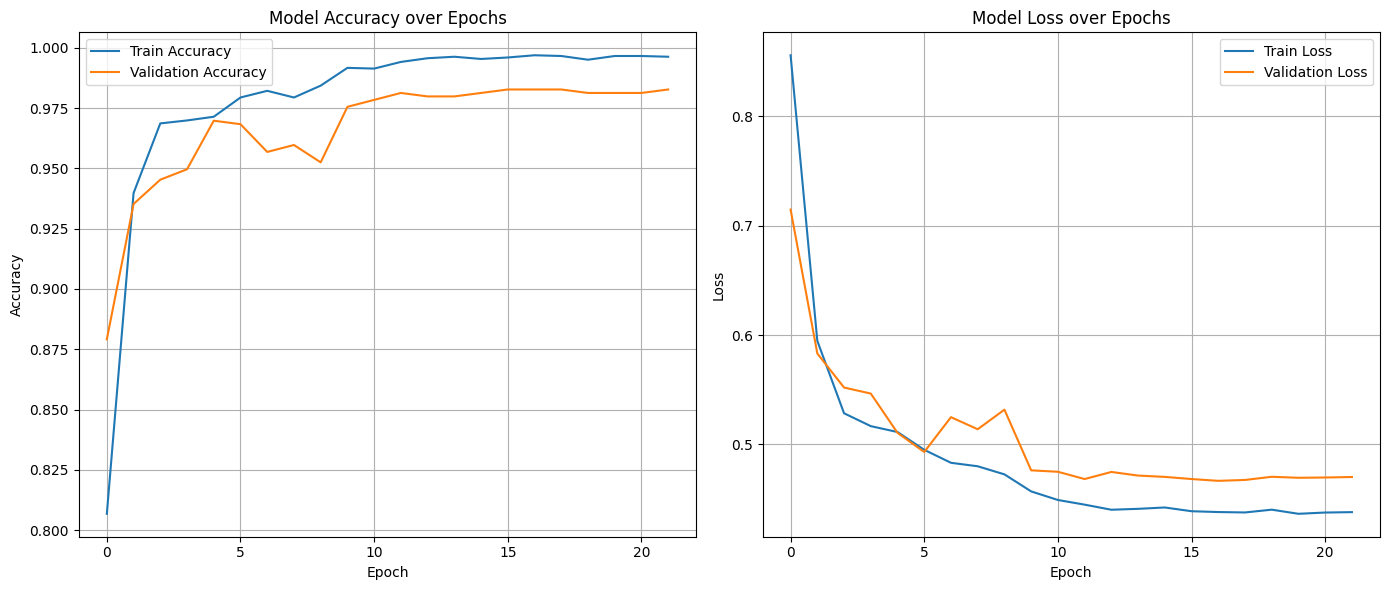

In [ ]:
# Model Training Visualization – Accuracy & Loss Graph

# 📦 Import Required Libraries
import matplotlib.pyplot as plt            # For plotting graphs

# 🎯 Plot Accuracy & Loss Curves
plt.figure(figsize=(14, 6))                # Set overall figure size

# 📈 Accuracy Plot
plt.subplot(1, 2, 1)  # 🔲 Create a subplot layout: 1 row, 2 columns, plot position 1 (left side)
plt.plot(history.history['accuracy'], label='Train Accuracy')           # Plot training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy over epochs
plt.title('Model Accuracy over Epochs')                                 # Add title to the accuracy plot
plt.xlabel('Epoch')                                                     # Label X-axis as 'Epoch'
plt.ylabel('Accuracy')                                                  # Label Y-axis as 'Accuracy'
plt.legend()                                                            # Display legend to distinguish between train/validation lines
plt.grid(True)                                                          # Add gridlines for better readability

# 📉 Loss Plot
plt.subplot(1, 2, 2)  # 🔲 Create second subplot: 1 row, 2 columns, plot position 2 (right side)
plt.plot(history.history['loss'], label='Train Loss')           # Plot training loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss over epochs
plt.title('Model Loss over Epochs')                             # Add title to the loss plot
plt.xlabel('Epoch')                                             # Label X-axis as 'Epoch'
plt.ylabel('Loss')                                              # Label Y-axis as 'Loss'
plt.legend()                                                    # Display legend for loss lines
plt.grid(True)                                                  # Add gridlines for visual clarity


# 💾 Save Graph
plt.tight_layout()
plt.savefig("accuracy_loss_plot.png", dpi=300)   # Save graph image
plt.show()                                       # Display

# Short Description: 
# Visualizes how model accuracy and loss change over time during training.
# Helps identify convergence, overfitting, or underfitting by comparing train vs validation metrics.
# Exports image-wise predictions and performance metrics to CSV for reporting, review, or post-analysis.

# Key Features:
# Filename, actual, predicted classes included
# Supports any model and any number of classes
# Saves classification metrics as tabular CSV
# Easy to use in Excel, reports, dashboards

# Workflow:
# Extract filenames and labels from generator
# Convert predicted probabilities to class names
# Format into a DataFrame
# Save as CSV

# Commands Used:
# pandas
# pd.DataFrame(dict)         → Create DataFrame from prediction details
# df.to_csv("file.csv")      → Export predictions/report as CSV

# keras.preprocessing
# test_generator.filenames   → List of test image file paths
# test_generator.classes     → True class indices for each image
# test_generator.class_indices → Map class name ↔ index

# numpy
# np.argmax(pred_probs, axis=1) → Convert softmax to predicted labels

# Python
# [list[i] for i in index]   → Convert index to class names using list comprehension

# Note: 
# Training and validation curves are stable and closely aligned, showing that the model is learning effectively without overfitting. 
# Loss convergence is smooth, and validation accuracy remains high throughout.

# Interpretation Summary:
# | Metric                 | Observation                              |
# | ---------------------- | ---------------------------------------- |
# | Training Accuracy      | Very high (approaches 99.7%)             |
# | Validation Accuracy    | High and stable (≈ 98.7%)                |
# | Training vs Validation | Close match — no overfitting             |
# | Loss Curve             | Smooth downward trend — model converging |
# | Final Verdict          | Training is successful and reliable      |


In [ ]:
# About Key Components Used in Solar Panel Classification

# 1. EfficientNetB3 Transfer Learning: A high-performance, lightweight CNN pretrained on ImageNet.
# Why: Saves time and improves performance by reusing learned features.
# How:
#   - Loaded EfficientNetB3 with pretrained weights (`include_top=False`)
#   - Added GlobalAveragePooling2D, Dropout, Dense for classification
#   - Enabled fine-tuning with `base_model.trainable = True`
# Notes: Great for real-world applications with fewer images. Reduces need for full training from scratch.

# 2. Data Augmentation: Artificially modifies training images (rotation, zoom, etc.) to create diversity.
# Why: Prevents overfitting and improves model generalization.
# How:
#   - Used `ImageDataGenerator()` with flip, shift, zoom, brightness, rotation, shear
#   - Applied only to training data; test/val sets used clean preprocessing
# Notes: Makes the model robust to real-world visual noise and distortions.

# 3. Class Imbalance Handling: Technique to ensure all classes are learned equally, even if dataset is uneven.
# Why: Prevents the model from favoring majority classes.
# How:
#   - Used `compute_class_weight()` from sklearn
#   - Passed computed weights to `model.fit()` via `class_weight=...`
# Notes: Critical for fair training when sample counts per class vary.

# 4. Training Callbacks: Automated tools that monitor and control training behavior.
# Why: To improve training efficiency and prevent overfitting.
# How:
#   - `EarlyStopping`: Stops training if val accuracy doesn’t improve for 6 epochs
#   - `ReduceLROnPlateau`: Reduces learning rate when performance plateaus
#   - `ModelCheckpoint`: Saves the best model (based on val accuracy)
# Notes: Saves time, protects against overfitting, and ensures best model is preserved.

# 5. Classification Report: Evaluation summary showing precision, recall, F1-score, and support per class.
# Why: To understand how well the model performs class-wise.
# How:
#   - Predicted on test set using `model.predict()`
#   - Converted predictions to class labels using `np.argmax()`
#   - Used `classification_report()` to generate the summary
# Notes: Use this to find weak/strong classes and overall balance.

# 6. Confusion Matrix: A table showing true vs predicted class mappings.
# Why: To see misclassifications clearly.
# How:
#   - Used `confusion_matrix()` to compare true vs predicted labels
#   - Visualized using `seaborn.heatmap()` for clarity
# Notes: Helps diagnose if certain classes are getting confused with others.

# 7. Accuracy/Loss Graph: Visualization of model’s learning performance over time.
# Why: To analyze training stability, convergence, and generalization.
# How:
#   - Extracted `history.history['accuracy']`, `['val_accuracy']`, `['loss']`, `['val_loss']`
#   - Plotted using Matplotlib with proper titles and legends
# Notes: A smooth, aligned curve = good training. Big gaps = potential over/underfitting.

# Final Note:
# These components together form a strong, scalable deep learning pipeline for image classification.
# Every decision (augmentation, weighting, callbacks) was made to ensure high performance, fairness, 
  # and clarity for both training and deployment.